In [26]:
"""1a."""
import numpy as np
def coefs_rl(x, y):
    beta_1 = np.sum((x-x.mean())*(y-y.mean()))/np.sum((x-x.mean())**2)
    beta_0 = y.mean()-beta_1*x.mean()
    return beta_1 , beta_0


In [161]:
"""
(b) Con el dataset gapminder, utilizar la función implementada en el item anterior para
realizar una regresión lineal entre los años y la expectiva de vida en Argentina. Comparar
los coeficientes con los obtenidos por scikit-learn.

datos = gapminder [???]
print(coefs_rl (datos [???] , datos [???]))
modelo = linear_model . LinearRegression ()
modelo.fit(datos [[???]] , datos [[???]])
beta_1 = modelo .???
beta_0 = modelo .???
print(beta_1 , beta_0)
"""

from gapminder import gapminder

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño

datos = gapminder[gapminder.country == 'Argentina']
# print(datos)
print(coefs_rl(datos.year, datos.lifeExp))

modelo = linear_model.LinearRegression()
modelo.fit(datos[['year']], datos[['lifeExp']])
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print(beta_1, beta_0)

(0.2317083916083916, -389.6063445221445)
0.23170839160839155 -389.6063445221444


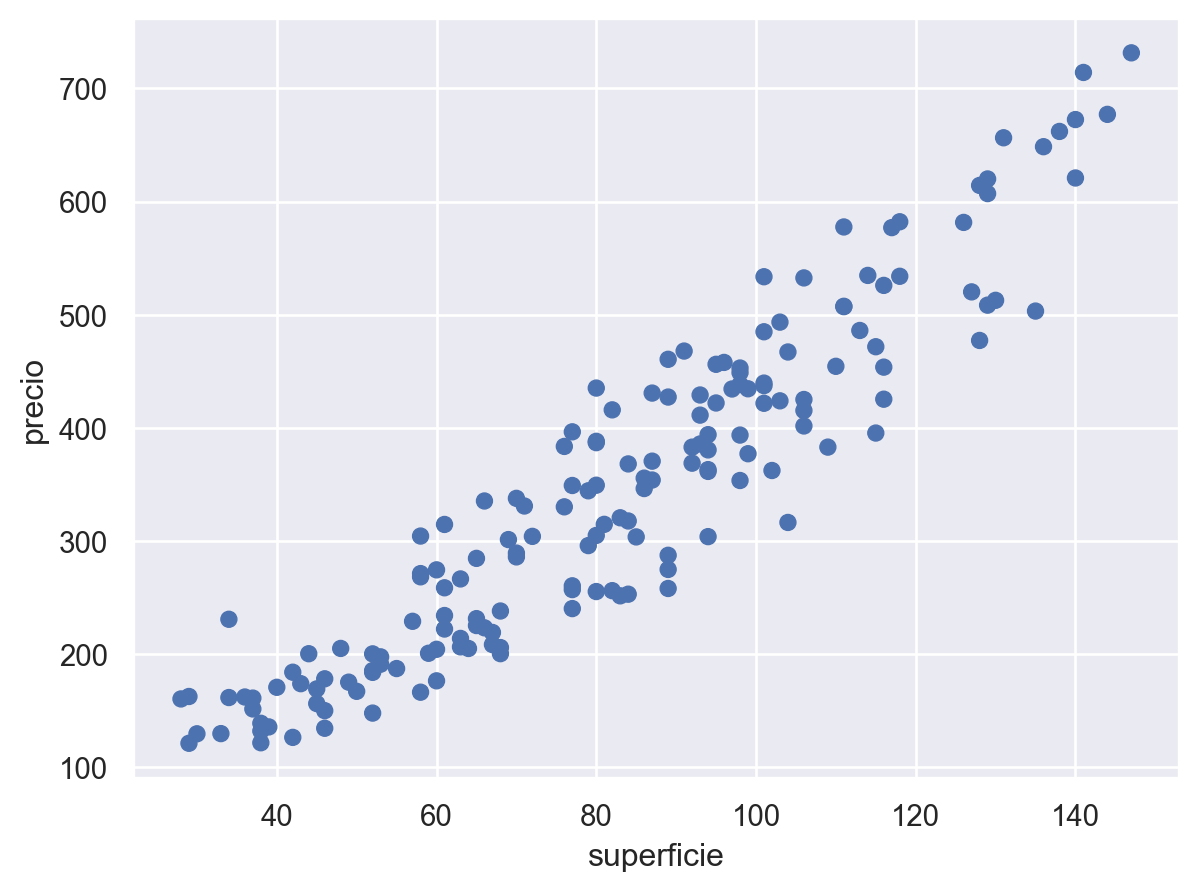

In [162]:
"""
En este ejercicio trabajaremos con el dataset de inmuebles (inmuebles.csv en la página de
la materia). El dataset contiene datos sobre inmuebles que están a la venta en cierta ciudad:
su superficie en m2, su precio en millones de pesos y la zona de la ciudad donde se encuentra.
Recordar como cargar un dataset desde un .csv y visualizar sus primeras filas:
datos = pd.read_csv('inmuebles.csv')
datos.head ()

(a) Realizar un gráfico de dispersión (scatterplot) que muestre la relación entre la superficie
y el precio de cada imueble.
"""
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so
from gapminder import gapminder

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score 

datos = pd.read_csv('./datos/inmuebles.csv')
datos.head()

(
so.Plot(datos.superficie,datos.precio)
.add(so.Dot())
)

[[4.73579682]] -45.73153403092567


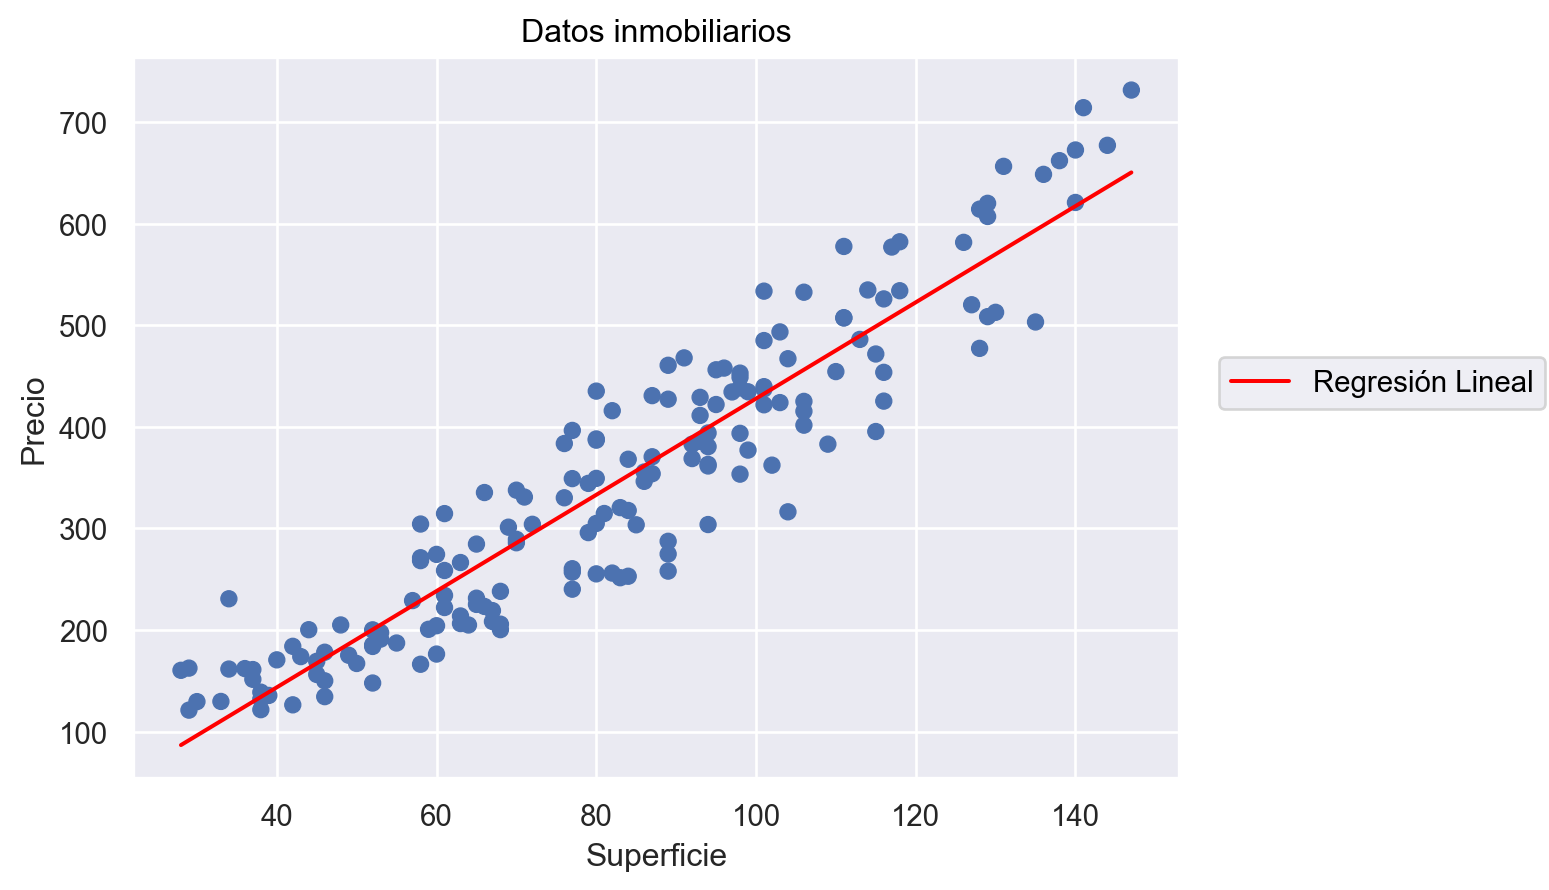

In [73]:
"""
(b) Realizar un gráfico de la regresión lineal entre ambas variables. El gráfico debe titularse
“Datos inmobiliarios” y la recta de Regresión Lineal debe tener una leyenda que diga
“Regresión”
"""

modelo = linear_model.LinearRegression()
modelo.fit(datos[['superficie']],datos[['precio']])
print(modelo.coef_, modelo.intercept_.item())
(
so.Plot(datos.superficie,datos.precio)
    .add(so.Dot())
    .add(so.Line(color='red'), so.PolyFit(1), label='Regresión Lineal')
    .label(
        title="Datos inmobiliarios",
        x="Superficie",
        y="Precio",
    )
)

In [74]:
"""
(c) Calcular los coeficientes de la recta que mejor ajusta a los datos. Según el modelo, ¿qué
podríamos interpretar sobre el costo del metro cuadrado en la ciudad?
"""
modelo = linear_model.LinearRegression()
modelo.fit(datos[['superficie']], datos[['precio']])
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('Beta_1: ', beta_1)
print('Beta_0: ', beta_0)
print('Podemos interpretar que cuanto más mtrs cuadrados, más es el precio')

Beta_1:  4.73579682230239
Beta_0:  -45.73153403092567
Podemos interpretar que cuanto más mtrs cuadrados, más es el precio


In [75]:
"""
(d) Para medir qué tan bien ajusta la recta a los datos, vamos a implementar dos funciones:
una que calcule el error cuadrático medio (ECM) y otra que calcule el coeficiente de
determinación R2
. Recordemos que: 
**********************
------(formulas)------
**********************
Para calcular ambas necesitamos los datos x, y y los coeficientes de la recta.
def ecm(x, y, pendiente , o_origen):
return ???
def r_cuad(x, y, pendiente , o_origen):
return ???

"""


def ecm(x, y, pendiente , o_origen):
    return 1/len(x) * np.sum((y - (pendiente * x + o_origen))**2)
def r_cuad(x, y, pendiente , o_origen):
    return np.sum(((pendiente * x + o_origen) - y.mean())**2) / np.sum((y - y.mean())**2)



In [76]:
"""
(e) Utilizando las funciones implementadas en el ítem anterior, calcular el ECM y el R2 del
ajuste realizado en el item b). ¿En qué unidades está cada medida? ¿Cómo podemos
interpretarlas?
"""
print('ECM: ', ecm(datos['superficie'], datos['precio'], beta_1, beta_0))
print('R^2: ', r_cuad(datos['superficie'], datos['precio'], beta_1, beta_0))


ECM:  2630.9300019446955
R^2:  0.8762114698357931


In [89]:
"""
(f) Comparar los resultados obtenidos en el ítem anterior con los proporcionados por r2_score
y mean_squared_error de scikit-learn
"""

y_pred = modelo.predict(datos[['superficie']]).flatten()
print('ECM: ', mean_squared_error(datos['precio'], y_pred))
print('R^2: ', r2_score(datos['precio'], y_pred))



ECM:  2630.9300019446955
R^2:  0.8762114698357936


No hay outliers: 


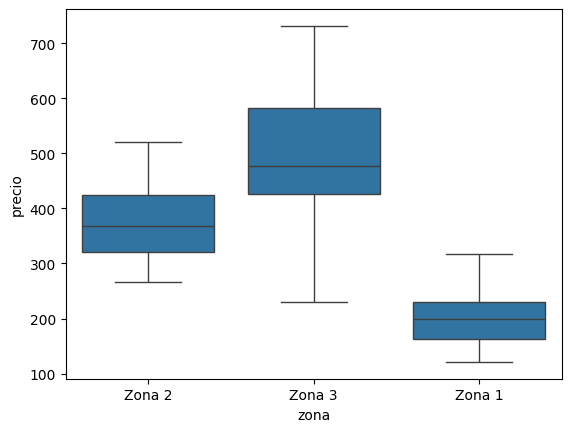

In [111]:
"""
(g) Mediante la confección de un boxplot, decidir en cuál de las zonas hay mayor variabilidad
de precios. ¿Hay algún outlier?
"""
(
    sns.boxplot(datos, x='zona', y='precio')
)
print('No hay outliers: ')

In [154]:
"""
(h) Para cada una de las zonas de la ciudad, calcular los coeficientes, el ECM y R2 de la recta
que mejor aproxima a los datos.
"""
modelo = linear_model.LinearRegression()

#Itero el 'Zona 1' 'Zona 2' y 'Zona 3' para usar los datos separados y hacer la regrsión de cada uno, luego printeo los valores
for i in [1,2,3]:
    dz = datos[datos['zona'] == f'Zona {i}']
    modelo.fit(dz[['superficie']], dz[['precio']])
    print(f'Coeficientes Zona {i}: ', (modelo.coef_.item(), modelo.intercept_.item()))
    y_pred = modelo.predict(dz[['superficie']]).flatten()
    print(f'ECM Zona {i}: ', mean_squared_error(dz[['precio']], y_pred))
    print(f'R^2 Zona {i}: ', r2_score(dz[['precio']], y_pred), '\n')


Coeficientes Zona 1:  (2.4420813883021224, 58.85200024117228)
ECM Zona 1:  331.22746770470974
R^2 Zona 1:  0.855923919218176 

Coeficientes Zona 2:  (4.266539806966732, 72.89381076100466)
ECM Zona 2:  109771.98270882251
R^2 Zona 2:  0.059940627284871595 

Coeficientes Zona 3:  (4.560544269538954, 24.966485225784936)
ECM Zona 3:  748.8800907160429
R^2 Zona 3:  0.9445652745220188 



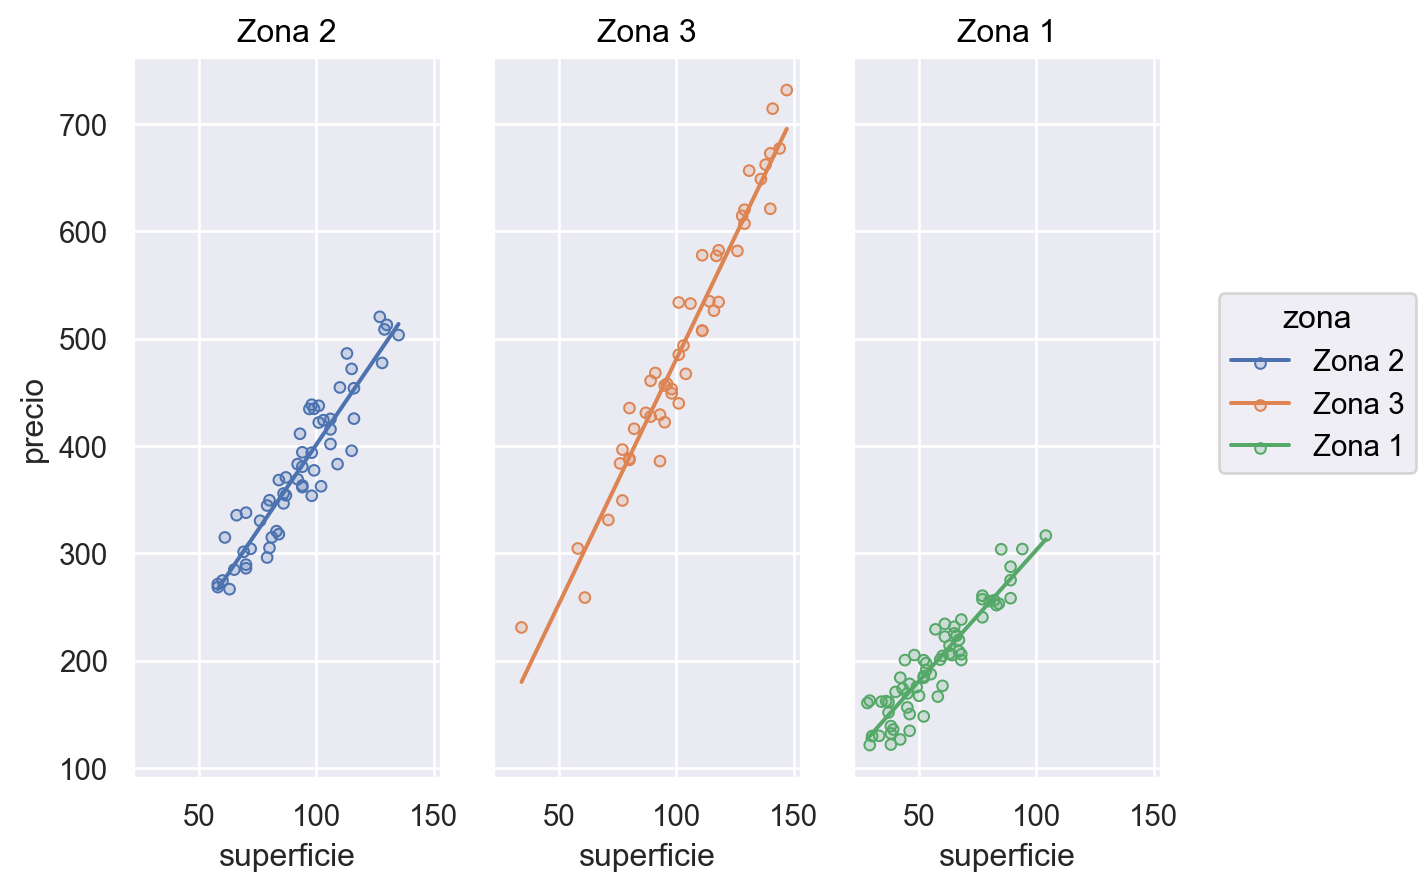

In [123]:
"""
(i) Graficar los datos y el ajuste lineal de cada zona utilizando el método facet() de Plot()
(recordar ejercicio 5.b de la práctica 3) ¿Cuál es el valor del metro cuadrado en cada zona?
¿Qué podemos concluir si comparamos estos valores con lo obtenido en el ítem c) ?
"""

(
    so.Plot(data=datos, x='superficie', y='precio')
    .add(so.Dots(), color='zona')
    .add(so.Line(), so.PolyFit(1), color='zona')
    .facet('zona')
)

In [127]:
"""
(j) Supongamos que queremos poner a la venta un inmueble de 105 m2. Sólo con esa 
información y teniendo en cuenta los items anteriores, ¿cuál sería el precio de refencia
para la venta? Si sabemos además que el inmueble está en la Zona 2, ¿cambiaría en algo
el valor calculado anteriormente?
"""

# Idealmente me hubiera guardado los coeficientes
modelo.fit(datos[['superficie']], datos[['precio']])
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('Sin saber zona: ', beta_1 * 105 + beta_0)

dz = datos[datos['zona'] == 'Zona 2']
modelo.fit(dz[['superficie']], dz[['precio']])
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('Sabiendo zona: ', beta_1 * 105 + beta_0)


Sin saber zona:  451.5271323108253
Sabiendo zona:  417.3894041623672


In [140]:
"""
(k) Si me ofrecen un inmueble de 100 m2en la Zona 2 a un precio de 300, ¿qué tan barato o
caro es respecto a su precio de referencia?
"""
dz = datos[datos['zona'] == 'Zona 2']
modelo.fit(dz[['superficie']], dz[['precio']])
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('Sabiendo que es Zona 2, el precio esperado es: ', beta_1 * 100 + beta_0 - 300)

if 300 < beta_1 * 100 + beta_0 - 300:
    print('El precio es más barato de lo esperado')
else:
    print('El precio es más caro de lo esperado')


Sabiendo que es Zona 2, el precio esperado es:  101.3580091668062
El precio es más caro de lo esperado


Coeficientes OL Zona 1:  (2.4420813883021224, 58.85200024117228)
ECM Zona OL 1:  331.22746770470974
R^2 Zona OL 1:  0.855923919218176 

Coeficientes OL Zona 2:  (4.266539806966732, 72.89381076100466)
ECM Zona OL 2:  109771.98270882251
R^2 Zona OL 2:  0.059940627284871595 

Coeficientes OL Zona 3:  (4.560544269538954, 24.966485225784936)
ECM Zona OL 3:  748.8800907160429
R^2 Zona OL 3:  0.9445652745220188 

---------------------------
Coeficientes Zona 1:  (2.442081388302122, 58.852000241172306)
ECM Zona 1:  331.22746770470974
R^2 Zona 1:  0.855923919218176 

Coeficientes Zona 2:  (3.206278999112207, 80.73010925558549)
ECM Zona 2:  611.4955812522104
R^2 Zona 2:  0.866027281146202 

Coeficientes Zona 3:  (4.560544269538954, 24.966485225784936)
ECM Zona 3:  748.8800907160429
R^2 Zona 3:  0.9445652745220188 



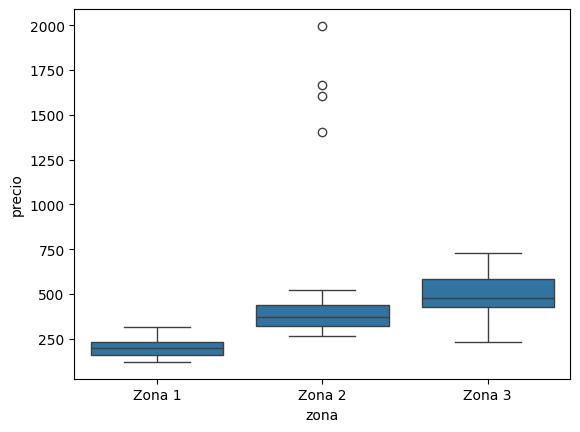

In [164]:
"""
(l) Efecto de los outliers. En este item trabajaremos con los datos de inmuebles_outliers.csv,
que tiene los mismos datos que inmuebles.csv, salvo cuatro que son outliers.
i. Realizar un boxplot que permita identificar en qué zona(s) se encuentran los outliers.
ii. Comparar los coeficientes del ajuste lineal de la(s) zona(s) afectada(s) con los obtenidos
en el ítem h)
"""
datos_ol = pd.read_csv('./datos/inmuebles_outliers.csv')

"""i"""

sns.boxplot(datos_ol, x='zona', y='precio', order = sorted (['Zona 1','Zona 2','Zona 3']))

"""ii"""
#Itero el 'Zona 1' 'Zona 2' y 'Zona 3' para usar los datos separados y hacer la regrsión de cada uno, luego printeo los valores
for i in [1,2,3]:
    dz = datos_ol[datos_ol['zona'] == f'Zona {i}']
    modelo.fit(dz[['superficie']], dz[['precio']])
    print(f'Coeficientes OL Zona {i}: ', (modelo.coef_.item(), modelo.intercept_.item()))
    y_pred = modelo.predict(dz[['superficie']]).flatten()
    print(f'ECM Zona OL {i}: ', mean_squared_error(dz[['precio']], y_pred))
    print(f'R^2 Zona OL {i}: ', r2_score(dz[['precio']], y_pred), '\n')

print('---------------------------')
#Itero el 'Zona 1' 'Zona 2' y 'Zona 3' para usar los datos separados y hacer la regrsión de cada uno, luego printeo los valores
for i in [1,2,3]:
    dz = datos[datos['zona'] == f'Zona {i}']
    modelo.fit(dz[['superficie']], dz[['precio']])
    print(f'Coeficientes Zona {i}: ', (modelo.coef_.item(), modelo.intercept_.item()))
    y_pred = modelo.predict(dz[['superficie']]).flatten()
    print(f'ECM Zona {i}: ', mean_squared_error(dz[['precio']], y_pred))
    print(f'R^2 Zona {i}: ', r2_score(dz[['precio']], y_pred), '\n')


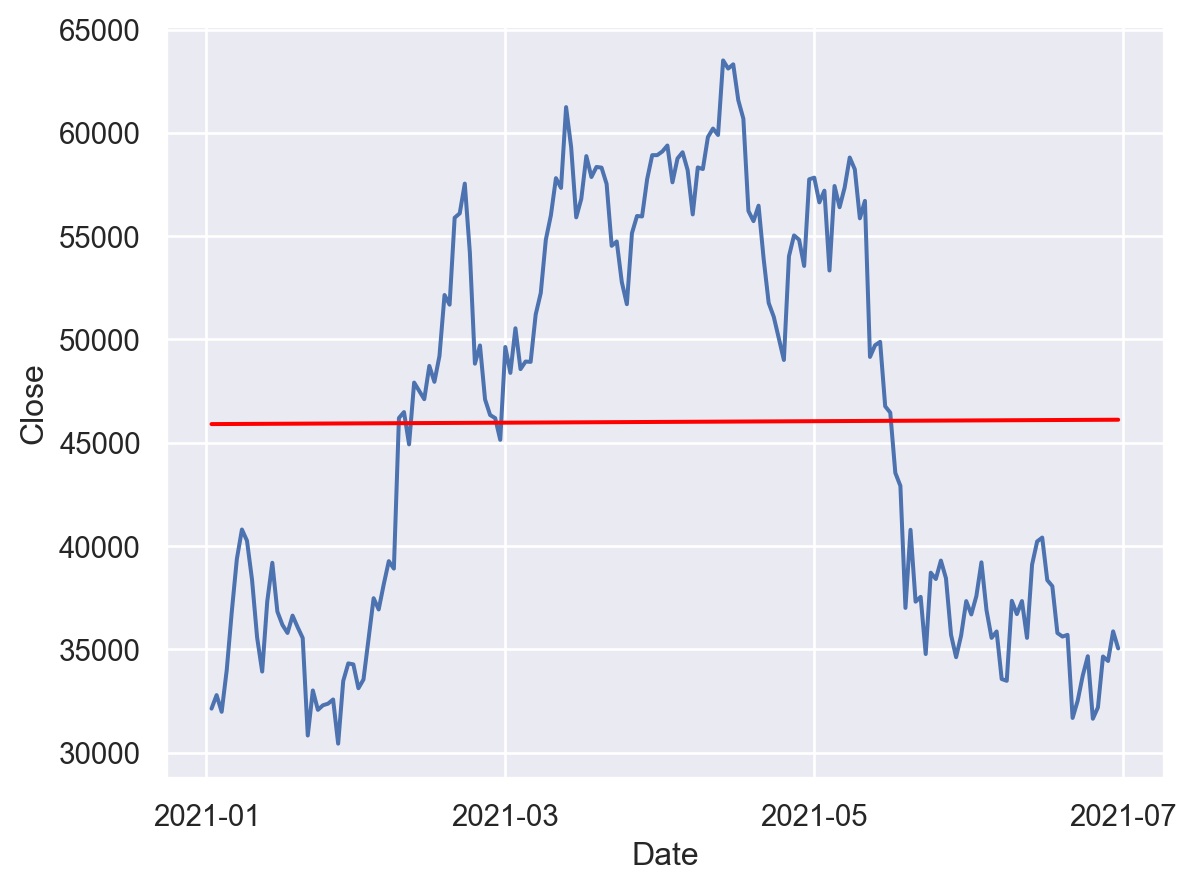

No sirve para predecir una regresión lineal


In [187]:
"""
3. En el archivo bitcoin.csv se encuentran datos de cotizacion de Bitcoin desde el 17/09/2014
hasta el 19/02/2022 1. Cargamos el dataset:
btc = pd.read_csv('datos/bitcoin.csv')
btc.head ()

Nos interesa analizar la evolución del precio de cierre (Close) en periodo comprendido entre el
01/01/2021 y el 01/07/2021:

# Nos aseguramos que pandas interprete la fecha correctamente
btc['Date'] = pd. to_datetime (btc['Date'], format='%Y-%m-%d')
# Filtramos el dataset en el periodo de interes
btc_2021 = btc [( btc['Date']>"2021 -01 -01") & (btc['Date']<"2021 -07 -01")]

Visualizar el ajuste lineal para los datos del dataframe btc_2021. En este caso, ¿resulta más
conveniente un scatterplot o un gráfico de lineas para los datos? ¿Te resultaría útil utilizar esta
recta para predecir el valor de BTC o para describir el cambio de su valor en este periodo?
"""
btc = pd.read_csv('datos/bitcoin.csv')
btc.head ()

# Nos aseguramos que pandas interprete la fecha correctamente
btc['Date'] = pd. to_datetime (btc['Date'], format='%Y-%m-%d')
# Filtramos el dataset en el periodo de interes
btc_2021 = btc [( btc['Date']>"2021 -01 -01") & (btc['Date']<"2021 -07 -01")]

display(
    so.Plot(btc_2021, x = btc_2021.Date, y= btc_2021.Close)
    .add(so.Line())
    .add(so.Line(color='red'), so.PolyFit(1))
    #.scale(x=so.Temporal('Date').tick(upto=25))
)
print('No sirve para predecir una regresión lineal')


In [201]:
"""
4. Utilizando el dataset tips de seaborn:
datos = sns. load_dataset ('tips')
realizar la Regresión Lineal donde la variable X es total_bill menos el promedio de total_bill
y la variable Y es tip. Responder las siguientes preguntas:
(a) ¿Qué interpretación se le puede dar a β0? Pista: calcular el promedio de las propinas.
(b) ¿Cambia el valor de β1 respecto a la Regresión Lineal de total_bill vs. tip?

"""
datos = sns.load_dataset('tips')
"""
(
    so.Plot(datos, x= datos.total_bill-np.mean(datos.total_bill), y = datos.tip)
    .add(so.Dot())
    .add(so.Line(color='red'),so.PolyFit(1))
)
"""
x= datos[['total_bill']]-np.mean(datos[['total_bill']])
y = datos[['tip']]
modelo = linear_model.LinearRegression()
modelo.fit(x, y)
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('(a)')
print('Beta 0: ', beta_0)
print('Beta 1: ', beta_1)

print('(b)')
print(np.mean(datos.tip), 'no cambia!')

(a)
Beta 0:  2.99827868852459
Beta 1:  0.10502451738435337
(b)
2.99827868852459 no cambia!


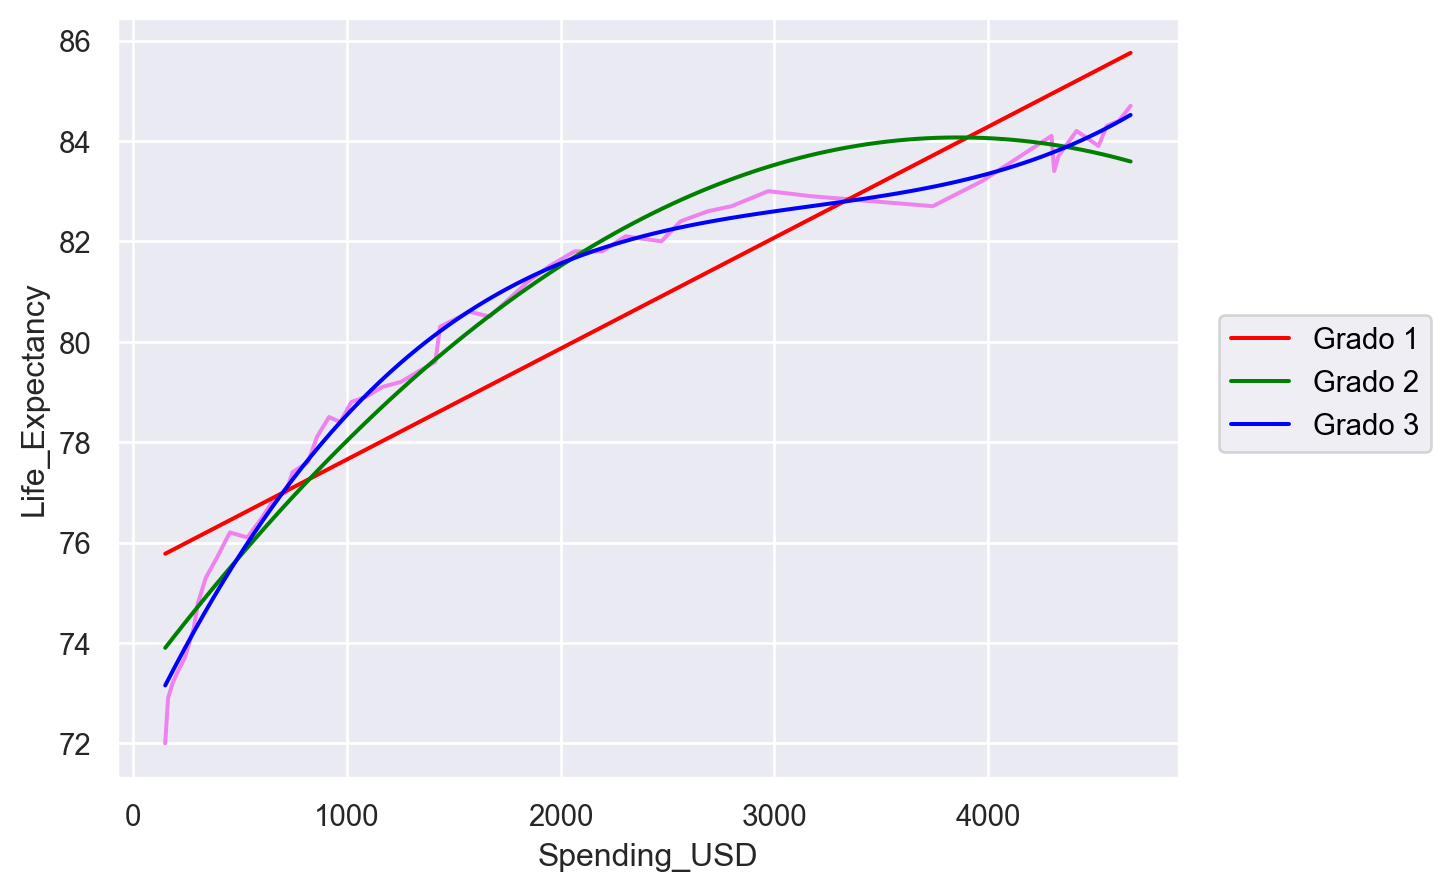

In [227]:
"""
5. En este ejercicio utilizaremos el dataset healthexp de seaborn, donde se recopila cada año
(Year) lo que cada país (Country) invierte en salud por habitante (Spending_USD) y suexpectativa de vida (Life_Expectancy).
Nos enfocaremos en los datos de Japón, nuestra variable predictora será Spending_USD y la dependiente será Life_Expectancy.
(a) Visualizar en un mismo gráfico los datos y los polinomios de grado 1, de grado 2 y de grado
3 que mejor ajustan a los datos. Añadir etiquetas que para facilitar la interpretación del
gráfico.
"""

datos = sns. load_dataset ('healthexp')
datos_j = datos[datos['Country'] == 'Japan']

(
    so.Plot(datos_j, x = datos_j.Spending_USD, y =datos_j.Life_Expectancy)
    .add(so.Line(color='violet'))
    .add(so.Line(color='red'), so.PolyFit(1), label='Grado 1')
    .add(so.Line(color='green'), so.PolyFit(2), label='Grado 2')
    .add(so.Line(color='blue'), so.PolyFit(3), label='Grado 3')
)


In [231]:
"""
(b) En base al gráfico obtenido en el ítem anterior, elegir el grado que considerás que mejor
ajusta a los datos. Utilizando scikit-learn, calcular los coeficientes de ese polinomio.
(c) Calcular el R2 y el ECM.
(d) Según el polinomio obtenido en el ítem anterior, estimar cuál sería la expectativa de vida
de los habitantes de Japón si el país invirtiera U$D 5000.
(e) Visualizar el polinomio de grado 10 que mejor ajusta a los datos. ¿Se aprecia una mejora?
¿Resulta conveniente ajustar con un polinomio de grado 50?
"""
print('El grado 3.')
modelo = linear_model.LinearRegression()
modelo.fit(datos_j[['Spending_USD']], datos_j[['Life_Expectancy']])
beta_1 = modelo.coef_.item()
beta_0 = modelo.intercept_.item()
print('Beta 0: ', beta_0)
print('Beta 1: ', beta_1)

print('------Correción, tenía que crear un polinomio y de ahí ajustarlo a mis datos -------')
datos_jp = datos[datos['Country'] == 'Japan']

# Indicamos que queremos un polinomio de Grado 3 sin ordenada al origen
polynomial_features= PolynomialFeatures(degree=3, include_bias=False)  
x_poly = polynomial_features.fit_transform(datos_jp[['Spending_USD']])
modelo = linear_model.LinearRegression()
modelo.fit(x_poly, datos_jp['Life_Expectancy'])
beta = modelo.coef_
beta_0 = modelo.intercept_
print(beta, beta_0)



El grado 3.
Beta 0:  75.44338492129279
Beta 1:  0.002210186574215229
------Correción, tenía que crear un polinomio y de ahí ajustarlo a mis datos -------
[ 9.09766222e-03 -2.68417332e-06  2.82168485e-10] 71.84403247811414


In [232]:
#ME ABURRI